<a href="https://colab.research.google.com/github/YusufAbdurrahmann/data-preprocessing/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# **Data Import**

In [2]:
df = pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Data Understanding**

In [3]:
df.shape

(614, 13)

In [4]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **Data Cleaning**

In [8]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [9]:
df = df.dropna(subset = ["Gender"])

In [10]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [11]:
df.duplicated().sum()

np.int64(0)

**Not use the imputation because data is sensitive**

In [12]:
df = df.fillna(df.mode().iloc[0])

In [13]:
df["Loan_Status"] = df["Loan_Status"].str.replace("YESES","Yes")
df["Loan_Status"] = df["Loan_Status"].str.replace("NO","No")

In [14]:
df.query('Loan_ID == "LP001003"')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [15]:
df.query('CoapplicantIncome == "1508.0"')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [16]:
df.loc[df.duplicated(subset = "Loan_ID")]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


# **Exploratory Data Analysis (EDA)**

In [17]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
30,LP001091,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360.0,1.0,Urban,N
250,LP001835,Male,Yes,0,Not Graduate,No,1668,3890.0,201.0,360.0,0.0,Semiurban,N
179,LP001630,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban,N
244,LP001811,Male,Yes,0,Not Graduate,No,3406,4417.0,123.0,360.0,1.0,Semiurban,Y
262,LP001870,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N


<function matplotlib.pyplot.show(close=None, block=None)>

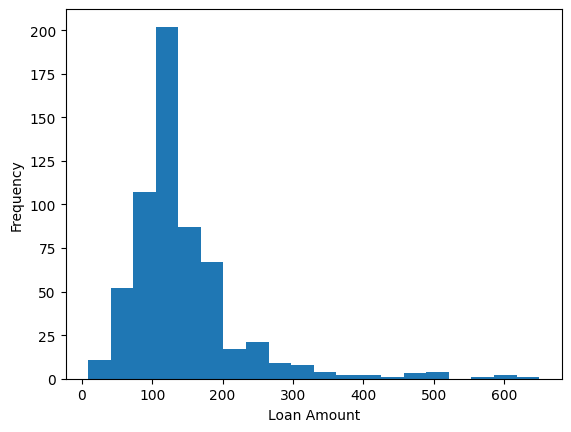

In [18]:
df["LoanAmount"].plot(kind = "hist",
                      bins = 20)
plt.xlabel("Loan Amount")
plt.show

<Axes: ylabel='count'>

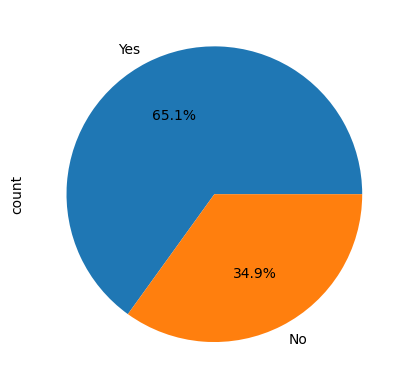

In [19]:
df["Married"].value_counts().plot(kind = "pie", autopct = "%1.1f%%")

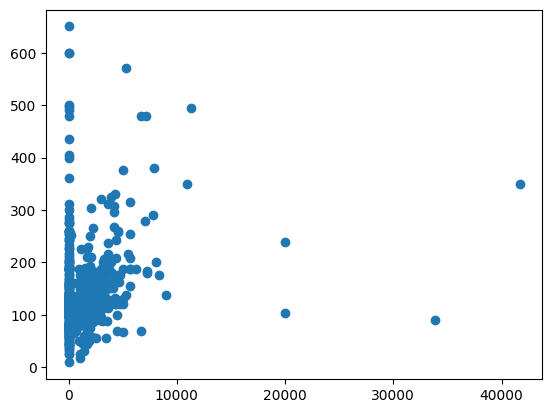

In [20]:
plt.scatter(df["CoapplicantIncome"], df["LoanAmount"])

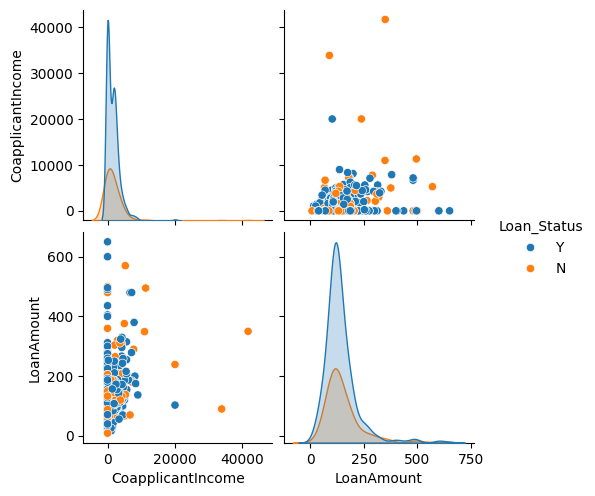

In [21]:
sns.pairplot(df,
             vars = ["CoapplicantIncome","LoanAmount"],
             hue = "Loan_Status")
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            601 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            601 non-null    object 
 3   Dependents         601 non-null    object 
 4   Education          601 non-null    object 
 5   Self_Employed      601 non-null    object 
 6   ApplicantIncome    601 non-null    int64  
 7   CoapplicantIncome  601 non-null    float64
 8   LoanAmount         601 non-null    float64
 9   Loan_Amount_Term   601 non-null    float64
 10  Credit_History     601 non-null    float64
 11  Property_Area      601 non-null    object 
 12  Loan_Status        601 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 65.7+ KB


# **Feature Engineering**

In [29]:
x = df.drop(columns = ["Loan_Status"])
y = df["Loan_Status"]

In [24]:
for col in df.select_dtypes(include = ["object"]).columns:

  labelencoder = LabelEncoder()

  labelencoder.fit(df[col].unique())

  df[col] = labelencoder.transform(df[col])

  print(f"{col}: {df[col].unique()}")

Loan_ID: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 2

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            601 non-null    int64  
 1   Gender             601 non-null    int64  
 2   Married            601 non-null    int64  
 3   Dependents         601 non-null    int64  
 4   Education          601 non-null    int64  
 5   Self_Employed      601 non-null    int64  
 6   ApplicantIncome    601 non-null    int64  
 7   CoapplicantIncome  601 non-null    float64
 8   LoanAmount         601 non-null    float64
 9   Loan_Amount_Term   601 non-null    float64
 10  Credit_History     601 non-null    float64
 11  Property_Area      601 non-null    int64  
 12  Loan_Status        601 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 65.7 KB


In [30]:
scaler = MinMaxScaler()
scaler.fit(x)
x =scaler.transform(x)

In [27]:
corr = df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]].corr()

<Axes: >

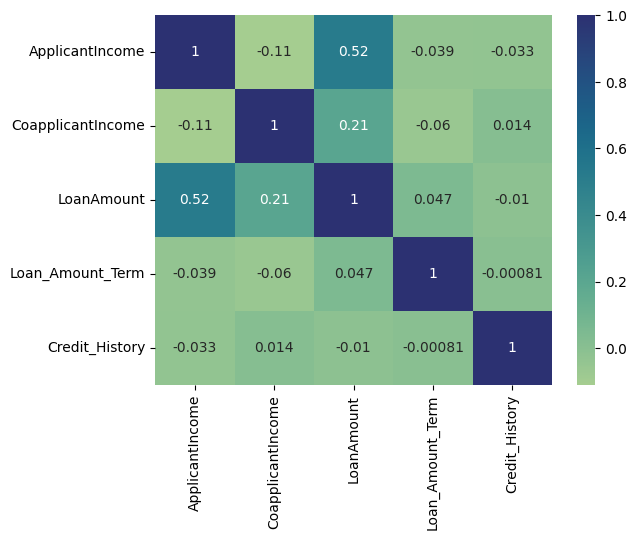

In [28]:
sns.heatmap(corr, cmap="crest", annot=True)